Can an RNN learn to keep a clock as it's state? No input, can an RNN follow a circle?

In [1]:
# create training data

import numpy as np
import scipy.signal as sig
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Create training and test data for the NN

epochs = 5000
batch_size = 100

# number of random channels that will be trained and tested on
num_train=epochs*batch_size
num_test=batch_size

data_length = 100
omega = 1/100 # rate of rotation, number of rotations / symbol


# QPSK
data_train = np.zeros((num_train, data_length,2))
data_test = np.zeros((num_test, data_length,2))

for i in range(num_train):
    
    # first choose a random starting point on the unit circle
    # there are 2pi radians in a circle, choose random number between 0 and 2pi
#     random_start = np.random.rand()*2*np.pi
    random_start = 0
    
    # real part of data
    data_train[i,0,:]=np.array([np.cos(random_start), np.sin(random_start)])
    
    # rotate data according to omega
    for j in range(1,data_length):
        data_train[i,j,0]=(data_train[i,j-1,0]*np.cos(omega)-data_train[i,j-1,1]*np.sin(omega))
        data_train[i,j,1]=(data_train[i,j-1,0]*np.sin(omega)+data_train[i,j-1,1]*np.cos(omega))
        
    if i % 10000 == 0:
        print(i)
    

for i in range(num_test):
    # first choose a random starting point on the unit circle
    # there are 2pi radians in a circle, choose random number between 0 and 2pi
#     random_start = np.random.rand()*2*np.pi
    random_start = 0 
    
    # real part of data
    data_test[i,0,:]=np.array([np.cos(random_start), np.sin(random_start)])
    
    # rotate data according to omega
    for j in range(1,data_length):
        data_test[i,j,0]=(data_test[i,j-1,0]*np.cos(omega)-data_test[i,j-1,1]*np.sin(omega))
        data_test[i,j,1]=(data_test[i,j-1,0]*np.sin(omega)+data_test[i,j-1,1]*np.cos(omega))

print("Data generation complete.")

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
Data generation complete.


2.798962382731165


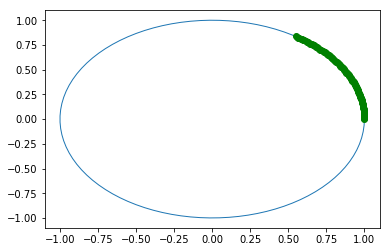

In [2]:
random_start = np.random.rand()*2*np.pi
print(random_start)

np.array([np.cos(random_start), np.sin(random_start)])

plt.figure()
# plot unit circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1)

k = 14

# plot the movement
for i in range(data_length):
    plt.plot(data_train[k,i,0],data_train[k,i,1], 'go')

plt.show()

In [3]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# fix random seed for reproducibility
np.random.seed()

learning_rate = 0.01
decay = 1 - 10*1e-10

batch_size = 100 # num of data streams
state_size = 20 # state size
output_size = 2 # size of the output

batch_data_placeholder = tf.placeholder(tf.float32, [None, data_length,2])

init_state = tf.placeholder(tf.float32, [None, state_size])

# Unpack columns
data = tf.unstack(batch_data_placeholder, axis=1)

# Forward pass
current_state = init_state
est_data_series = []
for current_data in data:
    
    layer_1 = tf.layers.dense(
      current_state, 400, tf.nn.tanh, use_bias=True)
    layer_2 = tf.layers.dense(
      layer_1, 400, tf.nn.sigmoid, use_bias=True)
    layer_3 = tf.layers.dense(
      layer_2, state_size, activation=tf.identity, use_bias=True)

#     layer_3 = tf.layers.dense(
#         layer_1, state_size, activation=tf.identity, use_bias=True)

    next_state = layer_3
#     print(next_state[:,0])

    layer_4 = tf.layers.dense(
         layer_3, output_size, activation=tf.identity, use_bias=True)


    est_data_series.append(layer_4)
#     print(est_data_series)
#     print(np.array(est_data_series).shape)
    current_state = next_state
    
print(tf.size(est_data_series))
print(tf.size(data))

estimation_cost = tf.losses.mean_squared_error(data,est_data_series)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(estimation_cost)
                                                                                  
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

/home/laura/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("Size:0", shape=(), dtype=int32)
Tensor("Size_1:0", shape=(), dtype=int32)


Epoch 0, Train Cost 1.3206826448440552, Test Cost: 61.499088287353516
Epoch 100, Train Cost 0.0001331845560343936, Test Cost: 0.00012892040831502527
Epoch 200, Train Cost 0.00029521057149395347, Test Cost: 0.000631282920949161
Epoch 300, Train Cost 0.0010990119772031903, Test Cost: 0.002206088276579976
Epoch 400, Train Cost 2.1985883904562797e-06, Test Cost: 9.677127081886283e-07
Epoch 500, Train Cost 0.001408718409948051, Test Cost: 4.3393607484176755e-05
Epoch 600, Train Cost 0.0012476521078497171, Test Cost: 0.0017884898697957397
Epoch 700, Train Cost 0.00014020684466231614, Test Cost: 1.3435530490824021e-05
Epoch 800, Train Cost 0.007035158574581146, Test Cost: 0.004952061455696821
Epoch 900, Train Cost 0.0004153359041083604, Test Cost: 0.00186661456245929
Epoch 1000, Train Cost 0.005972928833216429, Test Cost: 0.006983532104641199
Epoch 1100, Train Cost 0.0018028505146503448, Test Cost: 0.0029945136047899723
Epoch 1200, Train Cost 2.134262649633456e-05, Test Cost: 1.56269215949578

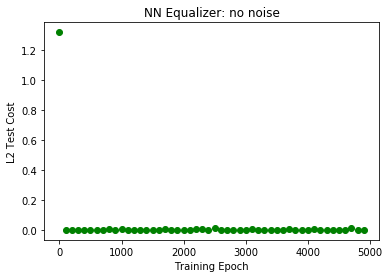

In [4]:
plt.figure()

# start the session
with tf.Session() as sess:
    #    initialize the variables
    sess.run(init_op)
    mc_losses = []
    
    for epoch in range(epochs):
        
        current_start = epoch*batch_size
        data_train_batch = data_train[current_start:(current_start+batch_size),:,:]
        
        # begin in state of all zeros
#         begin_state = np.zeros((batch_size, state_size))
        # begin in randome state
        begin_state = np.random.rand(batch_size,state_size)

        _,cost,est_data_batch = sess.run([optimizer, estimation_cost, est_data_series], 
                                          feed_dict={batch_data_placeholder: data_train_batch, 
                                                     init_state: begin_state})    

        if epoch % 100 == 0: 
            
            begin_state = np.random.rand(batch_size,state_size)
            mc_cost, mc_estimation = sess.run([estimation_cost, est_data_series], 
                                             feed_dict={batch_data_placeholder: data_test, 
                                                        init_state: begin_state})
            
            
#             plt.plot(epoch, mc_cost, 'bo')
#             plt.plot(epoch, zero_force_error, 'ro')
#             plt.plot(epoch, mse_error, 'go')
            print('Epoch {}, Train Cost {}, Test Cost: {}'.format(epoch, cost, mc_cost))
            plt.plot(epoch,cost,'go')
#             print('Epoch {}, Train Cost {}'.format(epoch, cost))
    
    
    plt.xlabel('Training Epoch')
    plt.ylabel('L2 Test Cost')
    plt.title('NN Equalizer: no noise')
    # plt.text(1000, .025, r'NN equalizer')
    # plt.text(0.5, .025, r'Zero Force equalizer')
    plt.show()
    
    

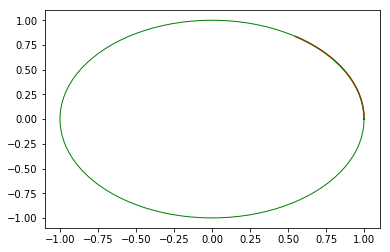

In [5]:
plt.figure()
plt.plot(np.array(mc_estimation)[0,:,0],np.array(mc_estimation)[0,:,1],color='b')
plt.plot(data_test[0,:,0],data_test[0,:,1],color='r')
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1, color='g')
plt.show()